# SuperstaQ for QSCOUT

Below is a brief tutorial on SuperstaQ optimizations for QSCOUT. For more information on QSCOUT, visit their website [here](https://www.sandia.gov/quantum/quantum-information-sciences/projects/qscout/). For those who'd like to follow along, try the code out on our [Jupyter Hub](https://tinyurl.com/3mbx2r3v).

## Install SuperstaQ packages
For those who do not have the following installed on their machine, uncomment the below lines and run to install.

In [1]:
# ! pip install qiskit-superstaq
# ! pip install pylatexenc

## Imports and Token

In [2]:
import os
import numpy as np
import qiskit as qiskit
import qiskit_superstaq as qss

In [27]:
# uncomment to add your token and set SUPERSTAQ_API_KEY variable in your local env
# token = "YOUR_TOKEN_HERE"
os.environ["SUPERSTAQ_API_KEY"] = token

## Circuit Compilation

In [12]:
# get provider
provider = qss.SuperstaQProvider()

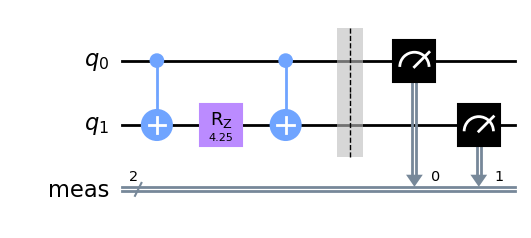

In [13]:
# create circuit
theta = np.random.uniform(0, 4 * np.pi)
circuit1 = qiskit.QuantumCircuit(2)
circuit1.cx(0, 1)
circuit1.rz(theta, 1)
circuit1.cx(0, 1)
circuit1.measure_all()

# draw circuit
circuit1.draw(output="mpl")

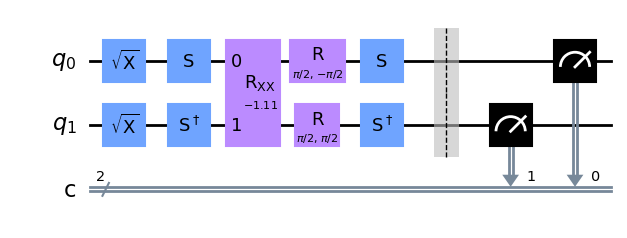

In [14]:
# compile with qscout compile
compiler_output = provider.qscout_compile(circuit1)
compiler_output.circuit.draw("mpl")

In [15]:
# get jaqal program
print(compiler_output.jaqal_program)

from qscout.v1.std usepulses *

register allqubits[2]

prepare_all
<
	R allqubits[0] 0.0 1.5707963267948966
	R allqubits[1] 0.0 1.5707963267948966
>
<
	Rz allqubits[0] 1.5707963267948966
	Rz allqubits[1] -1.5707963267948966
>
MS allqubits[0] allqubits[1] 0 -1.1073047855114515
<
	R allqubits[0] -1.5707963267948966 1.5707963267948966
	R allqubits[1] 1.5707963267948966 1.5707963267948966
>
<
	Rz allqubits[0] 1.5707963267948966
	Rz allqubits[1] -1.5707963267948966
>
measure_all



## Multiple Circuits

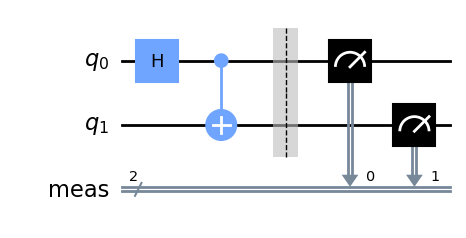

In [16]:
# create second circuit
circuit2 = qiskit.QuantumCircuit(2)
circuit2.h(0)
circuit2.cx(0, 1)
circuit2.measure_all()

# draw second circuit
circuit2.draw("mpl")

In [17]:
# create list of circuits
circuit_list = [circuit1, circuit2]

# compile list of circuits
compiler_output = provider.qscout_compile(circuit_list)

from qscout.v1.std usepulses *

register allqubits[2]

prepare_all
<
	R allqubits[0] 0.0 1.5707963267948966
	R allqubits[1] 0.0 1.5707963267948966
>
<
	Rz allqubits[0] 1.5707963267948966
	Rz allqubits[1] -1.5707963267948966
>
MS allqubits[0] allqubits[1] 0 -1.1073047855114515
<
	R allqubits[0] -1.5707963267948966 1.5707963267948966
	R allqubits[1] 1.5707963267948966 1.5707963267948966
>
<
	Rz allqubits[0] 1.5707963267948966
	Rz allqubits[1] -1.5707963267948966
>
measure_all



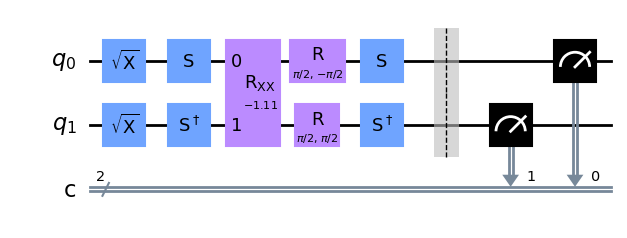

In [18]:
# draw and get jaqal program of first circuit
print(compiler_output.jaqal_programs[0])
compiler_output.circuits[0].draw("mpl")

from qscout.v1.std usepulses *

register allqubits[2]

prepare_all
<
	R allqubits[1] 3.141592653589793 0.7853981633974483
	R allqubits[0] 0.0 0.7853981633974483
>
Rz allqubits[0] -3.141592653589793
MS allqubits[0] allqubits[1] 0 -1.5707963267948966
<
	R allqubits[1] 3.141592653589793 0.7853981633974483
	R allqubits[0] 1.5707963267948966 1.5707963267948966
>
Rz allqubits[0] -2.356194490192345
measure_all



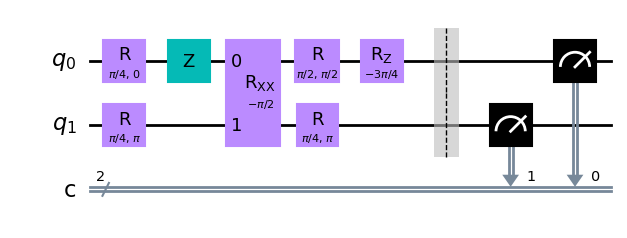

In [19]:
# draw and get jaqal program of second circuit
print(compiler_output.jaqal_programs[1])
compiler_output.circuits[1].draw("mpl")

## Entangling Basis Compilation

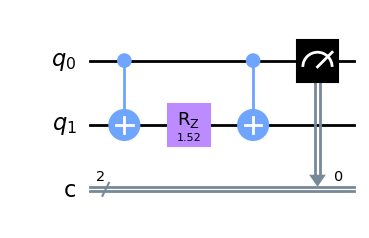

In [20]:
# create circuit
theta = np.random.uniform(0, np.pi)
circuit = qiskit.QuantumCircuit(2, 2)
circuit.cx(0, 1)
circuit.rz(theta, 1)
circuit.cx(0, 1)
circuit.measure(0, 0)

# draw circuit
circuit.draw(output="mpl")

from qscout.v1.std usepulses *

register allqubits[2]

prepare_all
<
	R allqubits[0] 3.141592653589793 1.5707963267948966
	R allqubits[1] 0.0 1.5707963267948966
>
<
	Rz allqubits[0] -1.5707963267948966
	Rz allqubits[1] -1.5707963267948966
>
MS allqubits[0] allqubits[1] 0 -1.5193176736817187
<
	R allqubits[0] -1.5707963267948966 1.5707963267948966
	R allqubits[1] 1.5707963267948966 1.5707963267948966
>
Rz allqubits[1] 1.5707963267948966
measure_all



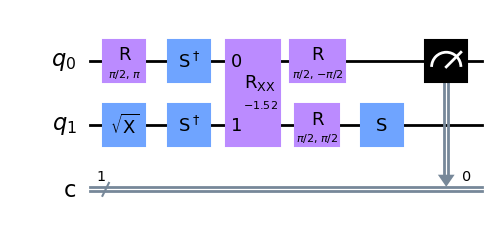

In [21]:
# compile with xx entangling basis
compiler_output = provider.qscout_compile(circuit, base_entangling_gate="xx")

# get jaqal program and draw circuit
print(compiler_output.jaqal_program)
compiler_output.circuit.draw(output="mpl")

from qscout.v1.std usepulses *

register allqubits[2]

prepare_all
R allqubits[1] 0.7853981633974483 3.141592653589793
ZZ allqubits[0] allqubits[1] -1.5193176736817187
R allqubits[1] 0.7853981633974483 3.141592653589793
measure_all



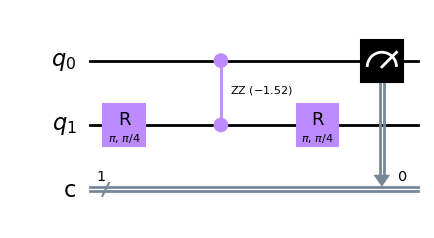

In [22]:
# compile with zz entangling basis
compiler_output = provider.qscout_compile(circuit, base_entangling_gate="zz")

# get jaqal program and draw circuit
print(compiler_output.jaqal_program)
compiler_output.circuit.draw(output="mpl")

## Swap Mirroring

### Create random QV circuit

In [23]:
# get random two-qubit circuit
circ = qiskit.circuit.library.QuantumVolume(2, 1, seed=123)
circ.measure_all()

### Compile without swap mirroring

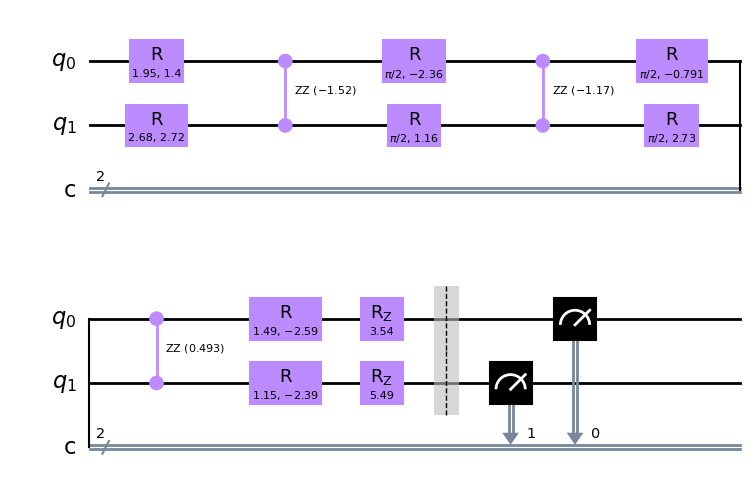

In [24]:
# no swap mirroring compile
circ_nsm = provider.qscout_compile(circ, mirror_swaps=False, base_entangling_gate="zz")

# draw circuit
circ_nsm.circuit.draw("mpl", fold=10)

### Compile with swap mirroring

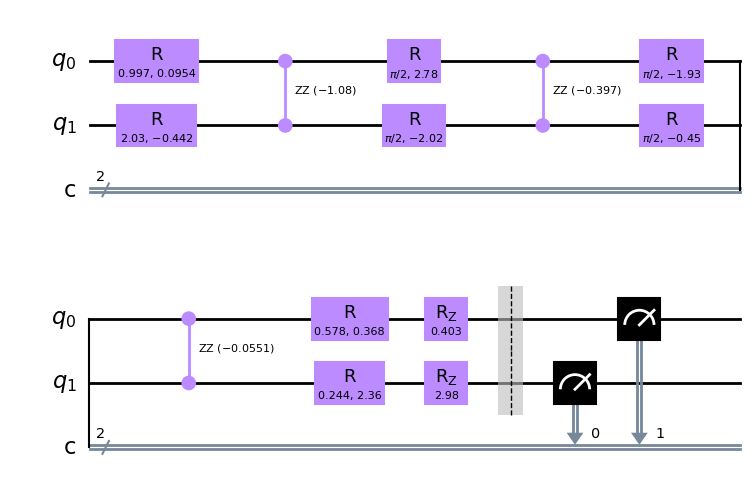

In [25]:
# swap mirroring compile
circ_nsm = provider.qscout_compile(circ, mirror_swaps=True, base_entangling_gate="zz")

# draw circuit
circ_nsm.circuit.draw("mpl", fold=10)

## Simulator

In [26]:
superstaq = qss.superstaq_provider.SuperstaQProvider()
backend = superstaq.get_backend("sandia_qscout_qpu")
qc = qiskit.QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure(0, 0)
qc.measure(1, 1)
job = backend.run(qc, shots=100, method="dry-run")
print(job.result().get_counts())

{'00': 51, '11': 49}
